***
# **Modelos**
***

## Algoritmo de Clasificación (df_NBA)

### Selection feature

In [ ]:
# Elegir las mejores columnas para el modelo
df_NBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48570 entries, 0 to 48569
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   level_0              48570 non-null  int64         
 1   index                48570 non-null  int64         
 2   GAME_ID              48570 non-null  int64         
 3   TEAM_ID              48570 non-null  int64         
 4   PLAYER_ID            48570 non-null  int64         
 5   FGM                  48570 non-null  float64       
 6   FGA                  48570 non-null  float64       
 7   FG3M                 48570 non-null  float64       
 8   FG3A                 48570 non-null  float64       
 9   FTM                  48570 non-null  float64       
 10  FTA                  48570 non-null  float64       
 11  OREB                 48570 non-null  float64       
 12  DREB                 48570 non-null  float64       
 13  REB                  48570 non-

In [ ]:
df_NBA.isnull().sum()

level_0                0
index                  0
GAME_ID                0
TEAM_ID                0
PLAYER_ID              0
FGM                    0
FGA                    0
FG3M                   0
FG3A                   0
FTM                    0
FTA                    0
OREB                   0
DREB                   0
REB                    0
AST                    0
STL                    0
BLK                    0
TO                     0
PF                     0
PTS                    0
PLUS_MINUS             0
FG_PCT                 0
FG3_PCT                0
FT_PCT                 0
VICTORY                0
SEASON                 0
TEAM                   0
GAME_DATE_EST          0
CONFERENCE             0
HOME_TEAM_ID           0
HOME_TEAM_NUM          0
START_DATE_SEASON      0
FINISH_DATE_SEASON     0
START_DATE_PLAYOFF     0
FINISH_DATE_PLAYOFF    0
INSTANCE               0
VICTORY_NUM            0
PERIOD                 0
LOCAL/VISIT            0
MATCHES                0


In [ ]:
df_NBA['VICTORY_NUM'].value_counts()

1    24285
0    24285
Name: VICTORY_NUM, dtype: int64

In [ ]:
X = df_NBA[['FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT',
            'OREB','DREB','REB','AST','STL','BLK','TO','PF','PTS','SEASON','HOME_TEAM_NUM']]
Y = df_NBA['VICTORY_NUM']

In [ ]:
# Divido el data set
x_train, x_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.3, random_state=42)

In [ ]:
sfs = SFS(LinearRegression(),
          k_features = 15,
          forward=True,
          scoring = 'r2',
          cv = 0)

sfs.fit(X, Y)
sfs.k_feature_names_

('FGM',
 'FGA',
 'FG_PCT',
 'FG3A',
 'FG3_PCT',
 'FTA',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TO',
 'PF',
 'PTS',
 'SEASON',
 'HOME_TEAM_NUM')

In [ ]:
x_SF = df_NBA[['FGM',
 'FGA',
 'FG_PCT',
 'FG3A',
 'FG3_PCT',
 'FTA',
 'FT_PCT',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TO',
 'PF',
 'PTS',
 'HOME_TEAM_NUM']]

In [ ]:
x_SF.shape

(48570, 15)

#### <u>Regresion Logistica</u>:

In [ ]:
# Modelo
clf = LogisticRegression (C=1, n_jobs=1, random_state=42)
clf.fit(x_train, Y_train)

LogisticRegression(C=1, n_jobs=1, random_state=42)

In [ ]:
predictions = clf.predict(x_test)

In [ ]:
print(classification_report (Y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7295
           1       0.85      0.85      0.85      7276

    accuracy                           0.85     14571
   macro avg       0.85      0.85      0.85     14571
weighted avg       0.85      0.85      0.85     14571



In [ ]:
importance = clf.coef_[0]
impo = pd.DataFrame(list(zip(x_train.columns, importance)), columns=['feature', 'importance'])
impo.sort_values('importance', ascending=False)

,feature,importance
13,STL,0.377517
11,REB,0.229416
17,PTS,0.168747
10,DREB,0.117607
14,BLK,0.116461
9,OREB,0.111809
3,FG3M,0.092361
19,HOME_TEAM_NUM,0.064986
12,AST,0.047494
6,FTM,0.027094


#### <u>Modelo Decision Tree</u>:

In [ ]:
# Entreno
model = tree.DecisionTreeClassifier(random_state=42)
model.fit(x_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
Y_pred = model.predict (x_test)

In [ ]:
print(classification_report (Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      7295
           1       0.73      0.73      0.73      7276

    accuracy                           0.73     14571
   macro avg       0.73      0.73      0.73     14571
weighted avg       0.73      0.73      0.73     14571



### PCA, Modelos y Metricas

In [ ]:
# Ordeno las filas por el ID del partido
df_NBA = df_NBA.sort_values(['GAME_ID'])

parametros = ['FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT',
            'OREB','DREB','REB','AST','STL','BLK','TO','PF','PTS','SEASON','HOME_TEAM_NUM']
target = 'VICTORY_NUM'

In [ ]:
n = df_NBA[parametros]
b = df_NBA[target]

# Division Train/Test

n_train, n_test, b_train, b_test = train_test_split (n, b, test_size=0.30, random_state=42)

In [ ]:
# Fijarse en cada columna del dataset si su distribucion es normal

normal_cols = [] # Columnas normalizadas

for col in n_train.columns:

  k2, p_value = stats.normaltest(df_NBA[col])
  #chequeo de si p-value es mayor a 0.05 es distribucion normal
  if p_value > 0.05:
    normal_cols.append(col)
  print (f'Columna {col}----Estadistico = {k2}, p_value = {p_value}')

# Conjunto de columnas que no presentan una distribucion normal
not_stander = list(set(x_train.columns) - set(normal_cols))

Columna FGM----Estadistico = 202.9652249192469, p_value = 8.446200751954733e-45
Columna FGA----Estadistico = 584.5486589290803, p_value = 1.1664644610475776e-127
Columna FG_PCT----Estadistico = 73.01551688388355, p_value = 1.395988890149607e-16
Columna FG3M----Estadistico = 2988.963855509999, p_value = 0.0
Columna FG3A----Estadistico = 2157.475595864497, p_value = 0.0
Columna FG3_PCT----Estadistico = 391.0440401109642, p_value = 1.2186124178160392e-85
Columna FTM----Estadistico = 1393.957736065659, p_value = 2.0226633728542115e-303
Columna FTA----Estadistico = 1376.26186828716, p_value = 1.4077724910792962e-299
Columna FT_PCT----Estadistico = 1417.992208269471, p_value = 1.221530410494375e-308
Columna OREB----Estadistico = 1740.3574205734267, p_value = 0.0
Columna DREB----Estadistico = 303.3324922341614, p_value = 1.35577062624902e-66
Columna REB----Estadistico = 332.2476187680969, p_value = 7.134216288895705e-73
Columna AST----Estadistico = 473.04418692925685, p_value = 1.904407837422

**Insight:** Realizado la prueba de normalizacion, no encontramos ninguna columna que tenga una distribucion normal, dado que el valor del P-value es menor a 0.05.

In [ ]:
# Variables que no tienen una distribución normal
not_stander

['FGM',
 'FTA',
 'FG3M',
 'FGA',
 'FG_PCT',
 'PF',
 'FTM',
 'FG3_PCT',
 'PTS',
 'OREB',
 'FT_PCT',
 'SEASON',
 'TO',
 'HOME_TEAM_NUM',
 'BLK',
 'AST',
 'FG3A',
 'DREB',
 'STL',
 'REB']

In [ ]:
normal_cols # Variables con distribución normal

[]

In [ ]:
# Proceso de transformacion en X_train, normalizo los datos de las columnas (distribucion mas desconocida)

rs = RobustScaler()
n_train[not_stander] = rs.fit_transform(n_train[not_stander])

In [ ]:
n_train.head()

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,SEASON,HOME_TEAM_NUM
27726,-1.428571,-1.1,-0.862898,0.000000,-0.307692,0.660539,1.625,1.727273,-0.209524,0.8,-0.250,0.111111,-0.166667,1.50,-1.000000,0.2,-0.666667,-0.388889,0.2,0.0
30507,0.142857,-0.6,0.682732,0.000000,-0.384615,0.849265,0.500,0.272727,0.582906,0.0,0.000,-0.111111,0.333333,-0.25,-0.666667,0.2,0.500000,0.333333,0.3,-1.0
15481,-0.571429,-0.5,-0.245083,0.166667,0.461538,-0.227482,-1.125,-0.545455,-1.739869,-0.6,0.000,-0.444444,-1.666667,-0.50,-1.000000,-0.4,-0.333333,-0.888889,-0.3,-1.0
45345,0.571429,0.5,0.298695,1.500000,1.307692,0.598840,-1.250,-1.363636,1.711111,-0.4,-1.250,-1.444444,0.000000,0.50,-0.666667,-0.6,0.000000,0.388889,0.9,-1.0
44911,0.000000,0.8,-0.485790,0.333333,0.461538,0.030331,-0.375,-0.181818,-0.384127,0.6,-0.125,0.111111,0.166667,0.00,-0.666667,-1.4,-0.666667,-0.055556,0.9,0.0


#### **<u>PCA</u>:**

In [ ]:
pca = PCA(random_state=42)

# Entreno y transformo
r_train_pca = pca.fit_transform(n_train)

# Dataframe con las nuevas variables y su relevancia
pcaData = pd.DataFrame(pca.explained_variance_ratio_).reset_index()
pcaData.columns=['Nueva variable','Relevancia']
pcaData.head(10)

,Nueva variable,Relevancia
0,0,0.231475
1,1,0.131951
2,2,0.116738
3,3,0.077948
4,4,0.073476
5,5,0.062204
6,6,0.056898
7,7,0.049972
8,8,0.046697
9,9,0.045250


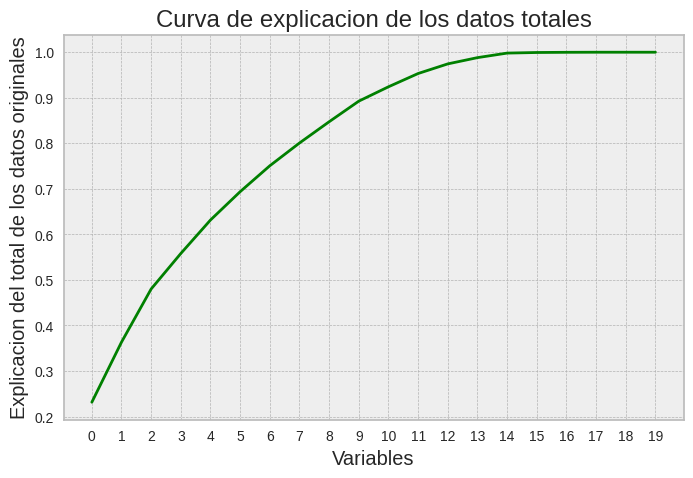

In [ ]:
# Grafico de la importancia acumulada de las variables nuevas

plt.rcParams['figure.figsize'] = 8, 5
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='Green')
plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), 1))
plt.xlabel('Variables')
plt.ylabel('Explicacion del total de los datos originales')
plt.title('Curva de explicacion de los datos totales')
plt.show()

**Insight:** Vemos que a partir de la variable 15 se puede explicar casi el 100% de todos los datos.

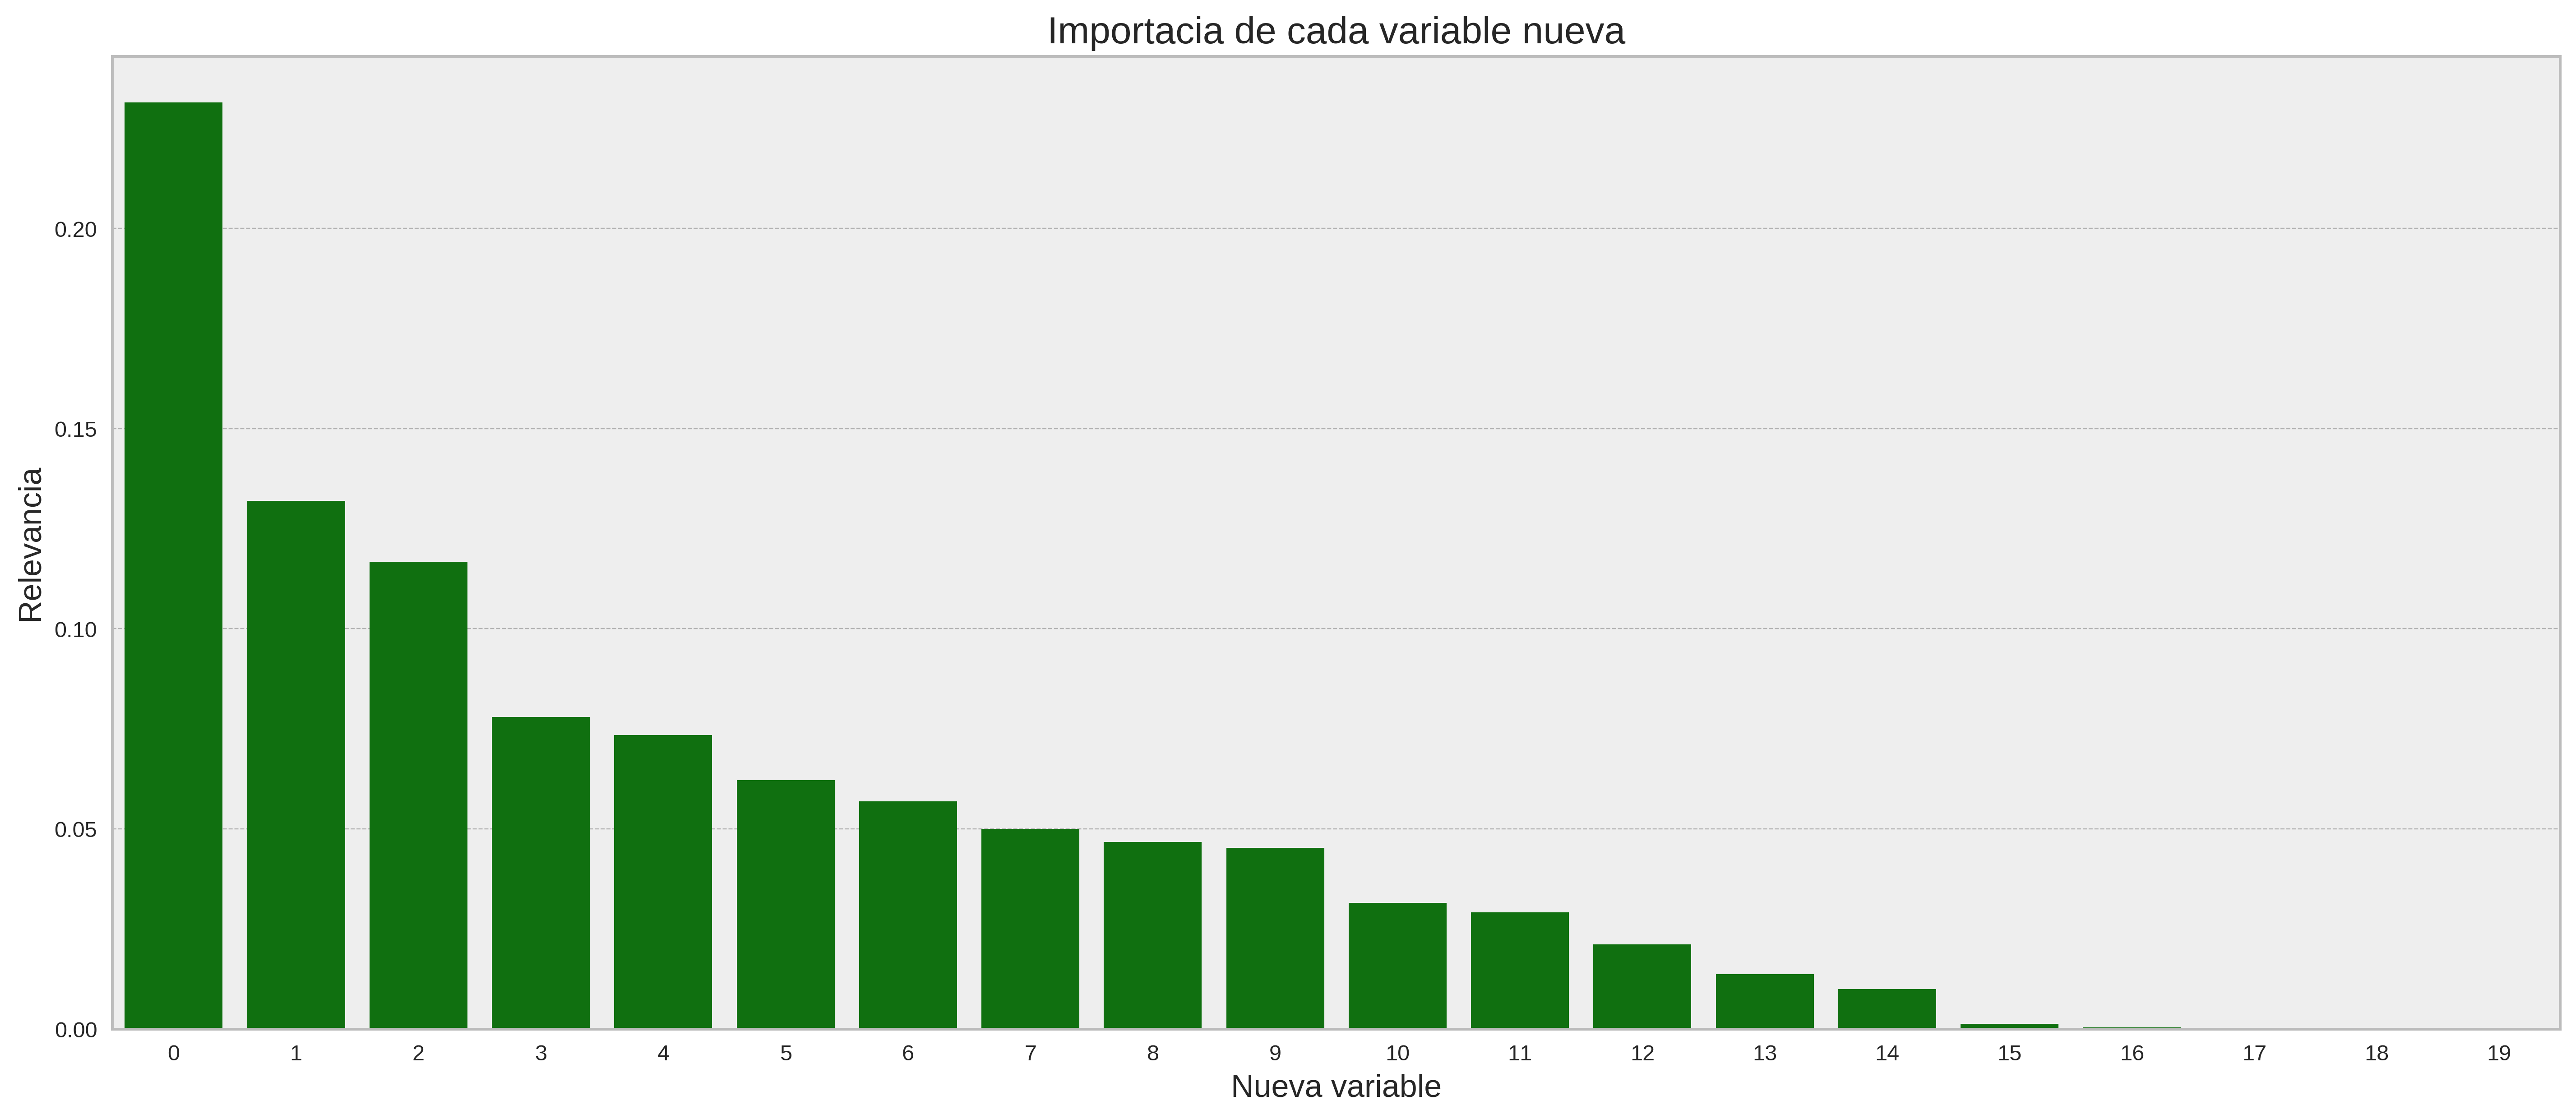

In [ ]:
# Grafico de barras

f, ax = plt.subplots(1, 1, figsize=(20, 8), dpi=350)
sns.barplot(data=pcaData, y='Relevancia', x='Nueva variable', color='Green')
ax.set(title='Importacia de cada variable nueva');

**Insight:** Como podemos ver en el grafico las ultimas 5 variables no tienen casi nada de insidencia en el total de los datos originales.

In [ ]:
# Vamos a entrenar con 14 variables de las 20 que teniamos

pca = PCA(n_components=14, random_state=42)
n_train = pca.fit_transform(n_train)

#### **<u>Modelos</u>:**

In [ ]:
# Regresion logistica
Reg_log = LogisticRegression(random_state=42)
Reg_log.fit(n_train, b_train)

# Arbol de desicion
Arb_dec = tree.DecisionTreeClassifier(random_state=42)
Arb_dec.fit(n_train, b_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Realizo la misma transformacion que hice en el train al conjunto del test

n_test[not_stander] = rs.transform (n_test[not_stander])
n_test = pca.transform(n_test)

# Predigo
i_pred = Reg_log.predict(n_test)
i_pred_AB = Arb_dec.predict(n_test)

#### **<u>Metricas</u>:**

In [ ]:
# Regresion Logistica (Metricas)
print('Logistic')

acc = accuracy_score(b_test, i_pred)
f1 = f1_score(b_test, i_pred)
auc = roc_auc_score(b_test, i_pred)
logreg_cm = confusion_matrix(b_test, i_pred)
tp, fp, fn, tn =  logreg_cm.ravel()
print(classification_report(b_test, i_pred))
stats = pd.Series({'accuracy': acc,
              'f1_score' : f1,
              'auc': auc,
              'true positive': tp,
              'true negative': tn,
              })
print(stats)

# Arbol de desicion (Metricas)
print('\nArbol')

acc_2 = accuracy_score(b_test, i_pred_AB)
f1_2 = f1_score(b_test, i_pred_AB)
auc_2 = roc_auc_score(b_test, i_pred_AB)
arb_cm = confusion_matrix(b_test, i_pred_AB)
tp, fp, fn, tn =  arb_cm.ravel()
print(classification_report(b_test, i_pred_AB))

stats_2 = pd.Series({'accuracy': acc_2,
              'f1_score' : f1_2,
              'auc': auc_2,
              'true positive': tp,
              'true negative': tn,
              })
stats_2

Logistic
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7335
           1       0.85      0.85      0.85      7236

    accuracy                           0.85     14571
   macro avg       0.85      0.85      0.85     14571
weighted avg       0.85      0.85      0.85     14571

accuracy            0.851280
f1_score            0.850541
auc                 0.851286
true positive    6238.000000
true negative    6166.000000
dtype: float64

Arbol
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      7335
           1       0.72      0.74      0.73      7236

    accuracy                           0.73     14571
   macro avg       0.73      0.73      0.73     14571
weighted avg       0.73      0.73      0.73     14571



accuracy            0.731590
f1_score            0.733383
auc                 0.731670
true positive    5281.000000
true negative    5379.000000
dtype: float64

In [ ]:
compare_RL_AD = pd.DataFrame({'Regresion Logistica': [acc, f1, auc],
                                'Arbol de decisión': [acc_2, f1_2, auc_2]},
                                 index = ['Accuracy', 'f1_score', 'AUC'])

compare_RL_AD.head()

,Regresion Logistica,Arbol de decisión
Accuracy,0.851280,0.731590
f1_score,0.850541,0.733383
AUC,0.851286,0.731670


**Insights:**

* Accuracy: Metrica de clasificacion, mide el porcentaje de efectividad de acierto del modelo. Podemos ver aca que es mejor atravez de la regresion logica (85%) que con un arbol de desicion (73%).
* F1 Score: Metrica que busca el balance entre presicion y sencibilidad, se usa para problemas desvalanceados (que este no es el caso). Podemos ver aproximadamente los mismos porcentajes en ambos modelos (85% y 73%).
* AUC: Para clasificacion Binaria, mide el rendimiento global del modelo. Que en este caso tambien mantienen aproximadamente los mismos porcentajes que las dos medidas anteriores.
* Sencibilidad (Recall) y Especificidad: El primero mide el porcentaje de acierto que el modelo predigo como positivo, es decir cuantas victorias (partido de NBA) establecio correctamente en comparacion a todas las victorias reales dentro del test. Y el segundo tiene la misma analogia pero tiene en cuenta las derrotas y no las victorias. En el primer modelo (Regresion logistica) el porcentaje aproximadamente se mantiene en ambas medidas (85%), en cambio en el arbol de desicion tiene mas efectividad prediciendo una victoria que una derrota (74% y 72% respectivamente).
* **Conclusión:** El mejor modelo para predecir nuestro target (el resultado de un partido NBA) es el de Regreción Logistica (85%).

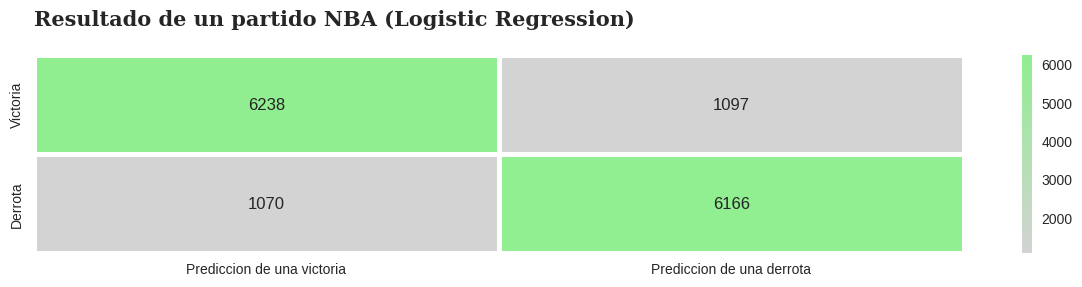

In [ ]:
# Grafico de la matriz de confusion

background_color = 'white'
colormap = LinearSegmentedColormap.from_list("", ["lightgray", "lightgreen"])

fig = plt.figure(figsize=(15,18))
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

# Mapa de calor
sns.heatmap(logreg_cm, linewidths=2.5,yticklabels=['Victoria','Derrota'],
            xticklabels=['Prediccion de una victoria','Prediccion de una derrota'],
            cmap=colormap,
            cbar=True,
            annot=True,
            fmt='d',
            ax=ax0,
            annot_kws={"fontsize":12}
            )

ax0.text(0, -0.3, 'Resultado de un partido NBA (Logistic Regression)',fontsize=15, fontweight='bold', fontfamily='serif')

plt.show()

In [ ]:
# Test:
acc = accuracy_score(b_test, i_pred)
f1 = f1_score(b_test, i_pred)

# Train:
i_pred_train = Reg_log.predict(n_train)
acc_train = accuracy_score(b_train, i_pred_train)
f1_train = f1_score(b_train, i_pred_train)

In [ ]:
# Comparacion de metricas entre el test y el train con Regreción Logistica
compare_train_test = pd.DataFrame({'Train': [acc_train, f1_train],
                                    'Test': [acc, f1]},
                                    index = ['Accuracy', 'f1_score'])

compare_train_test.head()

,Train,Test
Accuracy,0.847907,0.851280
f1_score,0.847907,0.850541


* **Insight:** Podemos ver que las métricas tanto del test como del train son similares, por lo que concluimos que no hay overfitting.

#### **<u>Busqueda de hiperparametros</u>**:

In [ ]:
# Diccionario para guardar todos las metricas
results = {}

<u>Modelo Base</u>:


In [ ]:
results['Modelo base'] = {'score_train': mean_absolute_error(b_train, Reg_log.predict(n_train)),
                   'score_test': mean_absolute_error(b_test, Reg_log.predict(n_test)),
                   'score_train_r2':r2_score(b_train, Reg_log.predict(n_train)),
                   'score_test_r2':r2_score(b_test, Reg_log.predict(n_test)),
                   'n_trainings': 1}

results

{'Modelo base': {'score_train': 0.15209270860907673,
  'score_test': 0.14872006039393315,
  'score_train_r2': 0.39162400722124735,
  'score_test_r2': 0.40509229584863693,
  'n_trainings': 1}}

* El score mientras más cerca del cero este, mejor va a ser el modelo. Con lo cual esta muy bien.
* Tanto los valores del train como del test son similares, otra confirmación que no hay overfitting.


In [ ]:
# Parametros
params_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'fit_intercept': [True, False],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'class_weight': [None, 'balanced'],
               'max_iter': [100, 200],
               'tol': [0.0001, 0.001, 0.01],
              'random_state': [42]}

<u>GridSearchCV</u>:

In [ ]:
grid_search =GridSearchCV(Reg_log, params_grid, cv=2, n_jobs=-1, refit=True,
                             scoring='f1', verbose=1)

model_grid = grid_search.fit(n_train, b_train)

Fitting 2 folds for each of 2880 candidates, totalling 5760 fits


In [ ]:
model_grid.best_estimator_

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear',
                   tol=0.001)

In [ ]:
results['Grid Search'] = {'score_train': mean_absolute_error(b_train, grid_search.predict(n_train)),
                         'score_test':mean_absolute_error(b_test, grid_search.predict(n_test)) ,
                         'score_train_r2':r2_score(b_train, grid_search.predict(n_train)),
                         'score_test_r2':r2_score(b_test, grid_search.predict(n_test)),
                        'n_trainings': pd.DataFrame(grid_search.cv_results_).shape[0] * 3}
results

{'Modelo base': {'score_train': 0.15209270860907673,
  'score_test': 0.14872006039393315,
  'score_train_r2': 0.39162400722124735,
  'score_test_r2': 0.40509229584863693,
  'n_trainings': 1},
 'Grid Search': {'score_train': 0.15212212123885996,
  'score_test': 0.14858280145494476,
  'score_train_r2': 0.39150635570456216,
  'score_test_r2': 0.405641356950761,
  'n_trainings': 8640}}

<u>RandomSearch</u>:

In [ ]:
reg_rand =RandomizedSearchCV(Reg_log, params_grid, cv=5, n_jobs=-1, refit=True,
                             scoring='f1', verbose=1)

model_rand = reg_rand.fit(n_train, b_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
model_rand.best_estimator_

LogisticRegression(C=0.001, max_iter=200, penalty='none', random_state=42,
                   solver='newton-cg')

In [ ]:
results['Random Search'] = {'score_train': mean_absolute_error(b_train, model_rand.predict(n_train)),
                   'score_test':mean_absolute_error(b_test, model_rand.predict(n_test)) ,
                   'score_train_r2':r2_score(b_train, model_rand.predict(n_train)),
                   'score_test_r2':r2_score(b_test, model_rand.predict(n_test)),
                   'n_trainings': pd.DataFrame(model_rand.cv_results_).shape[0] * 3}
results

{'Modelo base': {'score_train': 0.15209270860907673,
  'score_test': 0.14872006039393315,
  'score_train_r2': 0.39162400722124735,
  'score_test_r2': 0.40509229584863693,
  'n_trainings': 1},
 'Grid Search': {'score_train': 0.15212212123885996,
  'score_test': 0.14858280145494476,
  'score_train_r2': 0.39150635570456216,
  'score_test_r2': 0.405641356950761,
  'n_trainings': 8640},
 'Random Search': {'score_train': 0.15206329597929352,
  'score_test': 0.14851417198545055,
  'score_train_r2': 0.39174165873793243,
  'score_test_r2': 0.40591588750182295,
  'n_trainings': 30}}

<u>Comparativa final</u>:

In [ ]:
comparison = pd.DataFrame(results).T.reset_index()
comparison

,index,score_train,score_test,score_train_r2,score_test_r2,n_trainings
0,Modelo base,0.152093,0.148720,0.391624,0.405092,1.0
1,Grid Search,0.152122,0.148583,0.391506,0.405641,8640.0
2,Random Search,0.152063,0.148514,0.391742,0.405916,30.0


**Insight:** En conclusión parece mas conveniente usar el modelo base, ya que con un entrenamiento y menos tiempo obtiene valores muy similares a los otros dos.

## Algoritmo de Agrupación (df_players)

#### <u>Transformaciones</u>:

In [ ]:
# Vamos a usar "df_players", para ver que grupos de jugadores nos agrupa
df_players.head()

,PLAYER_NAME,MATCHES,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,...,PTS,FG_PCT,FG3_PCT,FT_PCT,VICTORY_NUM,CHAMPION_NUM,SEASON_NUM,BEST_15,BEST_10_DEFENCE,MVP_SEASON
0,A.J. Guyton,1.0,0.000000,4.000000,0.000000,2.000000,4.000000,4.000000,1.000000,1.000000,...,4.000000,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0
1,A.J. Lawson,2.0,1.000000,1.500000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,4.000000,0.333500,0.500000,0.500000,0.0,0.0,1.0,0.0,0.0,0.0
2,AJ Hammons,58.0,0.586207,1.310345,0.086207,0.206897,0.155172,0.344828,0.241379,0.793103,...,1.413793,0.153862,0.066086,0.064655,14.0,0.0,2.0,0.0,0.0,0.0
3,AJ Price,415.0,1.578313,4.062651,0.643373,1.939759,0.614458,0.826506,0.200000,0.848193,...,4.414458,0.249624,0.187631,0.231696,178.0,0.0,6.0,0.0,0.0,0.0
4,Aamir Simms,4.0,0.250000,0.500000,0.000000,0.000000,0.500000,0.500000,0.750000,0.500000,...,1.000000,0.250000,0.000000,0.250000,0.0,0.0,1.0,0.0,0.0,0.0


<Axes: >

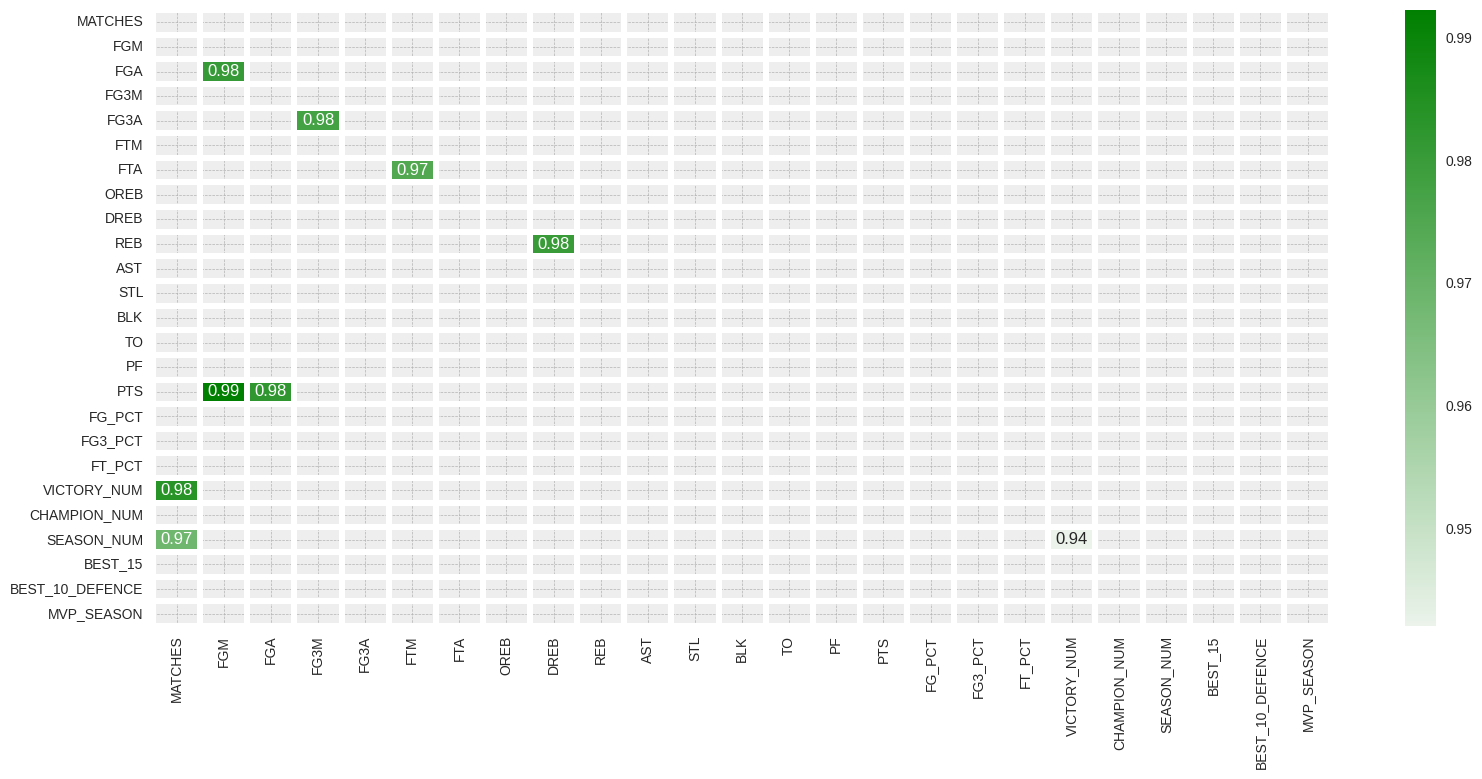

In [ ]:
# Volvemos a hacer el grafico de correlación pero esta vez solo destacando las relaciones superiores a 0,90,
# para eliminar las variables que tienen una vinculación muy fuerte (explicado en el apartado de análisis bivariado)

players = df_players.copy()

# Grafico de correlación
plt.rcParams['figure.figsize'] = 19, 8
corr = players.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.light_palette('Green', as_cmap=True)
high_corr = corr[corr>=.9]

sns.heatmap(high_corr, mask=mask, cmap=cmap, annot=True, linewidth=3)

**Variables (relación)** ----------------------------------------> **Eliminar**
* FGA y FGM (0,98) -----------------------------------> FGM
* FTA y FTM (0,97) ------------------------------------> FTM
* FG3A y FG3M (0,98) -------------------------------> FG3M
* REB y DREB (0,98) ----------------------------------> DREB
* PTS y FGA (0,98) ------------------------------------> FGA
* VICTORY_NUM Y MATCHES (0,98) ---------> MATCHES
* VICTORY_NUM Y SEASON_NUM (0,94) --> SEASON_NUM

In [ ]:
# Elimino las variables
players.drop(['PLAYER_NAME', 'FGM', 'FTM','FG3M', 'DREB', 'FGA', 'MATCHES', 'SEASON_NUM'], axis=1, inplace=True)

# Normalizo los valores de las variables, para poder trabajar con K-Means
scaler = RobustScaler()
sData = pd.DataFrame(scaler.fit_transform(players), columns = players.columns)

<Axes: >

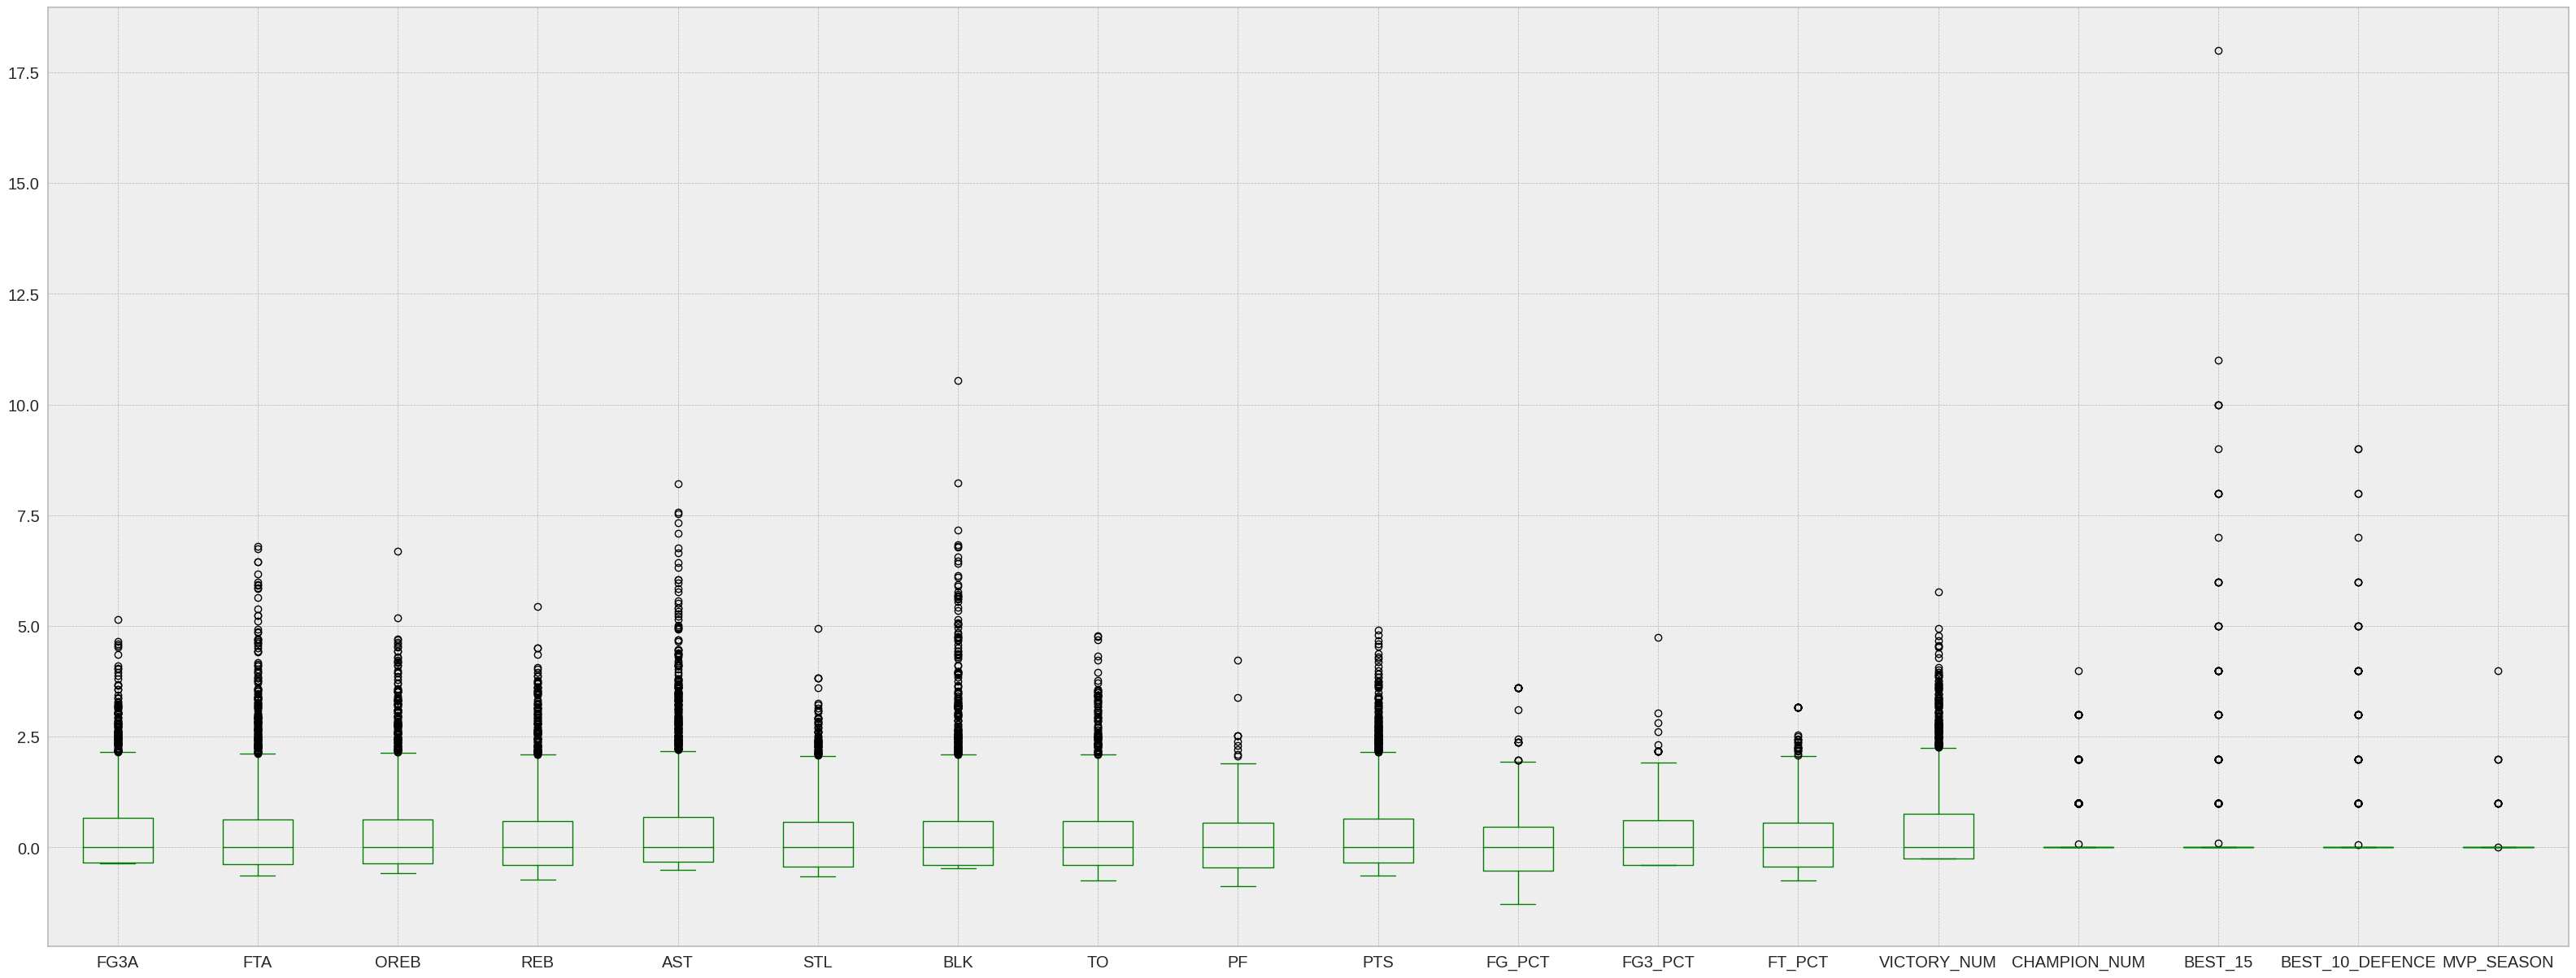

In [ ]:
# Grafico de las variables
sData.boxplot(fontsize = 'large', figsize = (40, 15), color='green')

* Se puede ver la presencia de muchos valores atípicos en las variables.


#### <u>PCA (todas las variables)</u>:

In [ ]:
pca = PCA(random_state=42)
pcaData = pd.DataFrame(pca.fit_transform(sData))
pca.explained_variance_ratio_

array([0.55455228, 0.14695783, 0.06398953, 0.04544261, 0.03518456,
       0.03384136, 0.02501428, 0.02038744, 0.0162143 , 0.01279897,
       0.01176122, 0.00782593, 0.00743823, 0.00590868, 0.0053897 ,
       0.00396959, 0.00270726, 0.00061624])

In [ ]:
# Nueva tabla
pcaData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.452107,-0.476920,-0.221401,-2.112445,0.473580,-1.757476,-1.323058,-0.413471,2.629813,-0.041957,-0.385546,1.694708,0.742747,-0.471192,-0.162329,-0.375016,0.617556,0.014988
1,-0.997352,-1.049319,-0.437081,0.231502,1.056860,-1.495816,0.156827,0.681133,-0.354503,-0.997850,0.137008,0.223195,0.313358,1.431357,-0.528136,0.397662,-0.026512,-0.017952
2,-1.937928,0.546989,0.234436,0.141281,0.456510,0.193468,-0.175357,-0.006087,-0.227873,-0.078663,0.031682,-0.049579,-0.027870,0.086018,0.123273,0.065183,-0.046225,0.003428
3,-0.210714,-1.320847,-0.037159,0.390231,-0.195153,-0.038153,-0.071300,-0.046985,-0.188443,-0.251796,-0.104167,0.065983,-0.114233,0.016969,-0.083970,-0.113493,0.094095,-0.006608
4,-1.769698,0.418058,0.096606,-0.628012,-0.349918,-0.450713,0.283149,-0.036105,-0.205052,-0.588125,-0.222988,0.526429,0.250356,-0.272773,-0.110463,-0.151836,0.081175,-0.013454


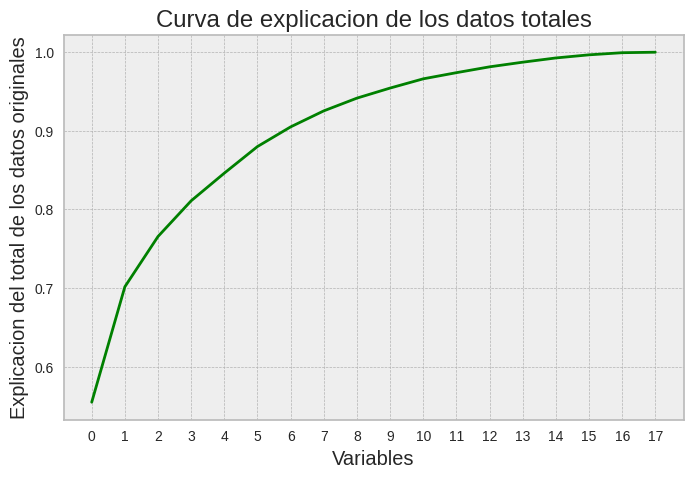

In [ ]:
# Grafico para ver importancia acumulada de las variables nuevas

plt.rcParams['figure.figsize'] = 8, 5
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='Green')
plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), 1))
plt.xlabel('Variables')
plt.ylabel('Explicacion del total de los datos originales')
plt.title('Curva de explicacion de los datos totales')
plt.show()

* Este grafico nos ayuda a ver que con solo 7 variables tenemos mas del 90% de los datos, por lo que podemos borrar mas de la mitad de los parámetros (10 de las 15 que hay).




In [ ]:
# Elimino las columnas que no son relevantes
pcaData.drop(columns = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17], inplace=True)
pcaData.head()

,0,1,2,3,4,5,6,7
0,1.452107,-0.476920,-0.221401,-2.112445,0.473580,-1.757476,-1.323058,-0.413471
1,-0.997352,-1.049319,-0.437081,0.231502,1.056860,-1.495816,0.156827,0.681133
2,-1.937928,0.546989,0.234436,0.141281,0.456510,0.193468,-0.175357,-0.006087
3,-0.210714,-1.320847,-0.037159,0.390231,-0.195153,-0.038153,-0.071300,-0.046985
4,-1.769698,0.418058,0.096606,-0.628012,-0.349918,-0.450713,0.283149,-0.036105


#### <u>K-Means</u>:

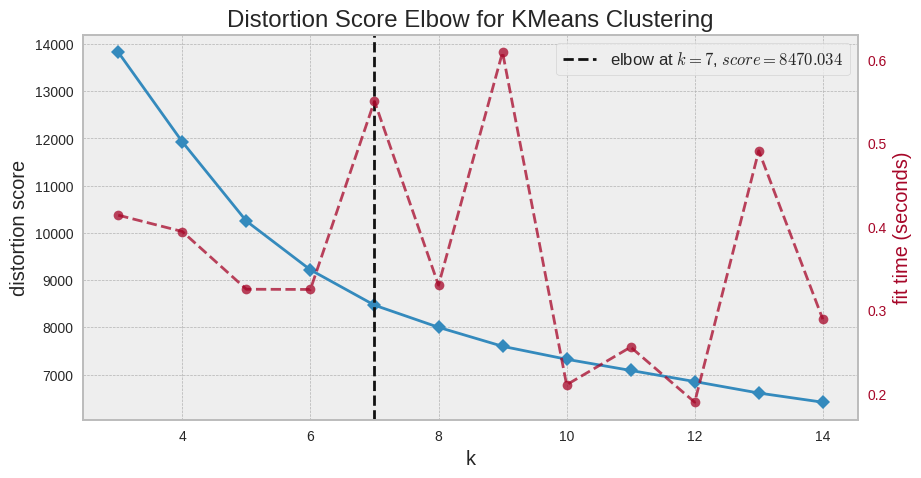

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Grafico del Metodo del codo, minimo 3 grupos de jugadores.

plt.rcParams['figure.figsize'] = 10, 5
visualizer = KElbowVisualizer(KMeans(random_state=42), k = (3, 15))
visualizer.fit(pcaData)
visualizer.poof()

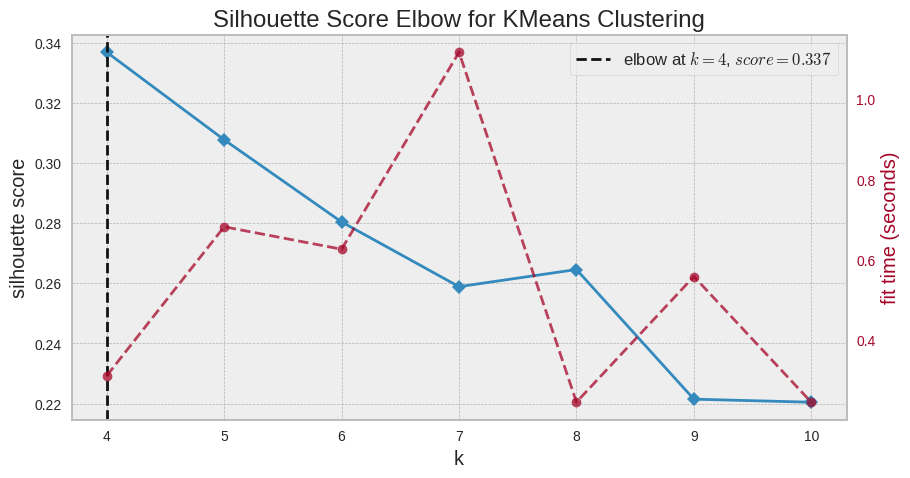

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Busqueda por Silhouette Score

visualizer = KElbowVisualizer(KMeans(random_state=42), k = (4, 11), metric= 'silhouette')
visualizer.fit(pcaData)
visualizer.poof()

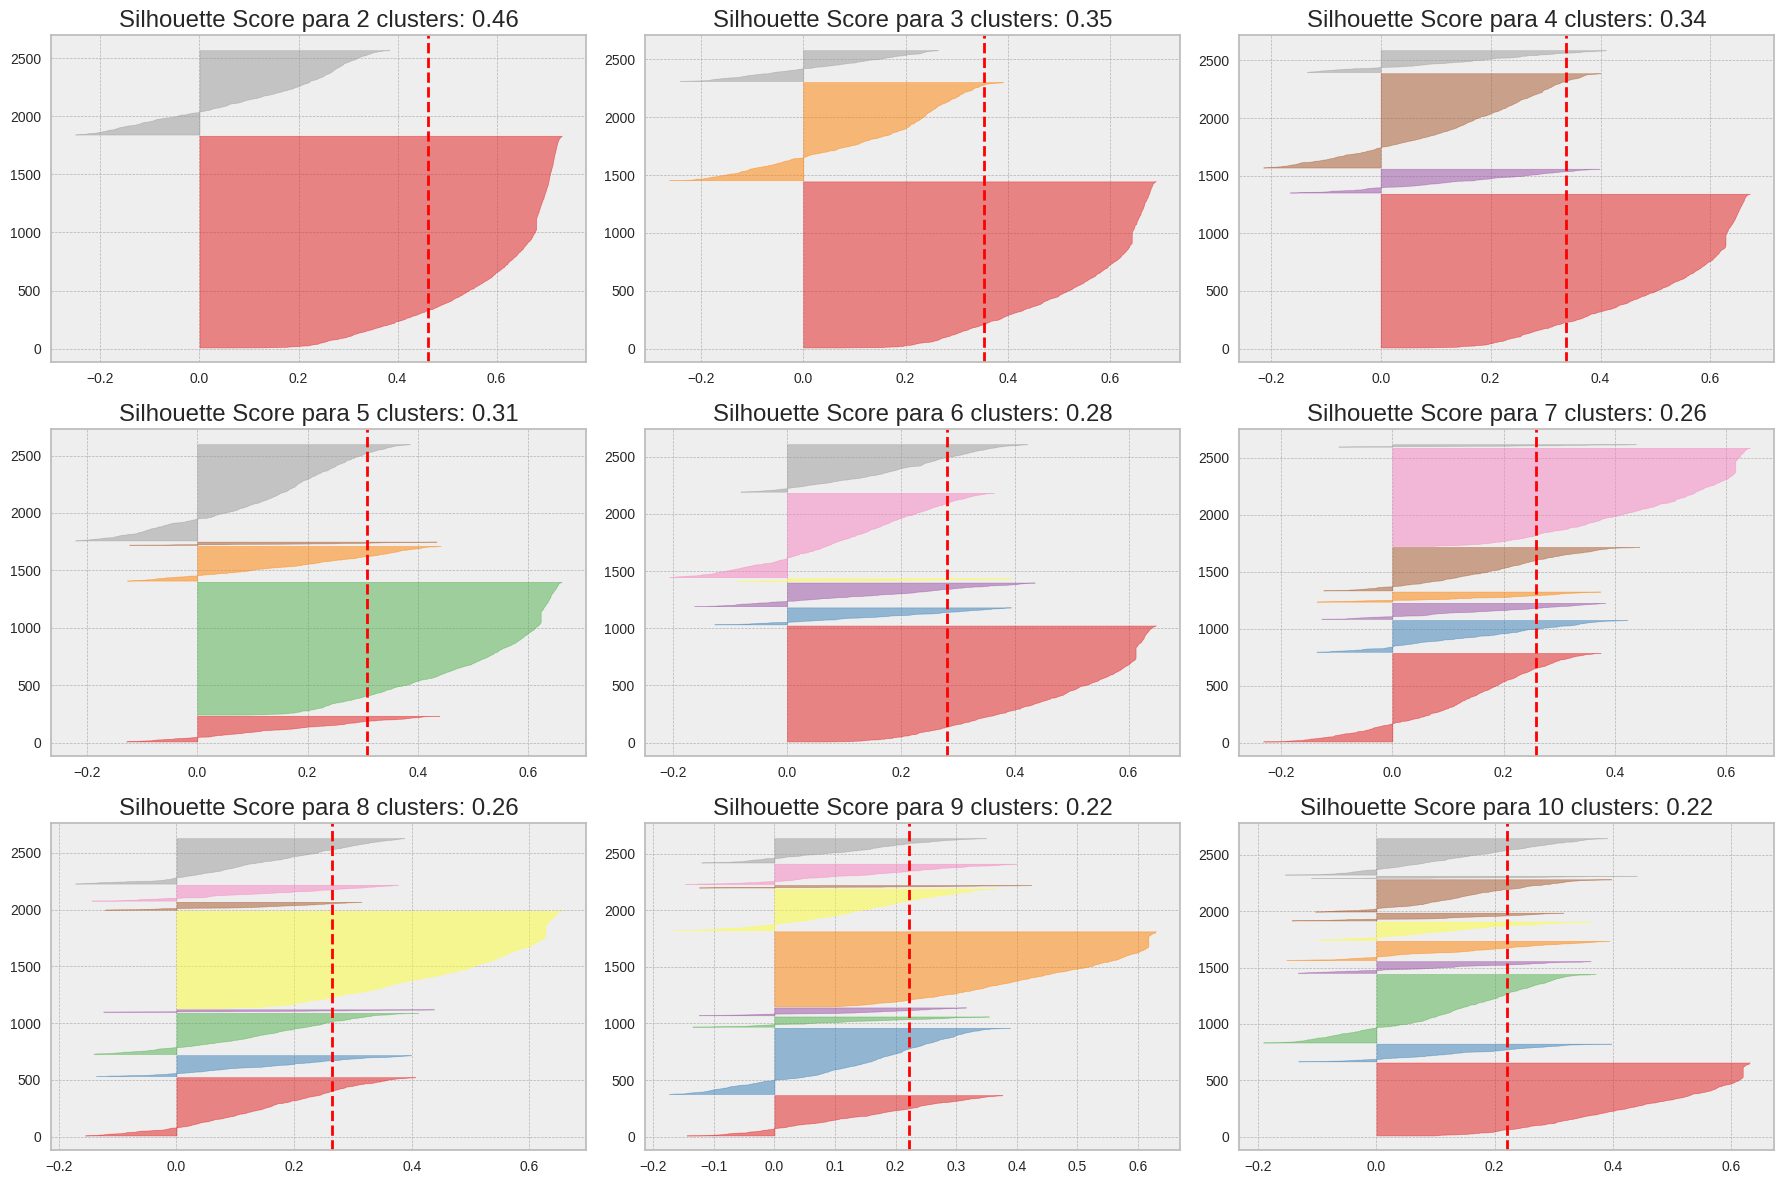

In [ ]:
# Grafico para ver la cercania de cada grupo segun el numero de clusters (Silhouette Score),
# hasta 10 grupos.

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize = (18,12))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for i in range(2,11):
    modelKM = KMeans(n_clusters = i, random_state=42)
    silViz = SilhouetteVisualizer(modelKM, ax=ax[i-2])
    silViz.fit(pcaData)
    txtx = 'Silhouette Score para ' + str(i) + ' clusters: '+ str(round(sil_score(pcaData, modelKM.labels_), 2))
    ax[i-2].set_title(txtx)
fig.tight_layout()

**Insights:**
* Analizando los gráficos parece mas adecuado dividir los jugadores en 7 grupos, ya que podemos ver que hay grupos con las mismas proporciones (cantidad), por lo que se puede realizar una comparación entre ellos y ver sus características. El objetivo es diferenciar todos los jugadores, en un numero de grupos aceptable que los distinga, ya que en los análisis anteriores vimos que hay mucha diferencia de niveles de estadística y en premios tanto individuales como grupales.
* Ademas podemos ver en el grafico de Silhouette que si los agrupamos en 7, todos ellos superan el promedio (0,26).

In [ ]:
# Entrenamiento del modelo con 7 grupos
modelKM = KMeans(n_clusters = 7, random_state=42)
modelKM.fit(pcaData)

# Generacion del clusters
pcaPredKM = pd.Series(modelKM.labels_)
print(pd.concat({
    "Plyers" : pcaPredKM.value_counts(),
    "Percent" : round(pcaPredKM.value_counts(normalize = True)*100, 2)
}, axis = 1))

   Plyers  Percent
5     861    33.76
0     777    30.47
4     381    14.94
1     279    10.94
2     141     5.53
3      89     3.49
6      22     0.86


#### <u>Hirarchical Clustering</u>:

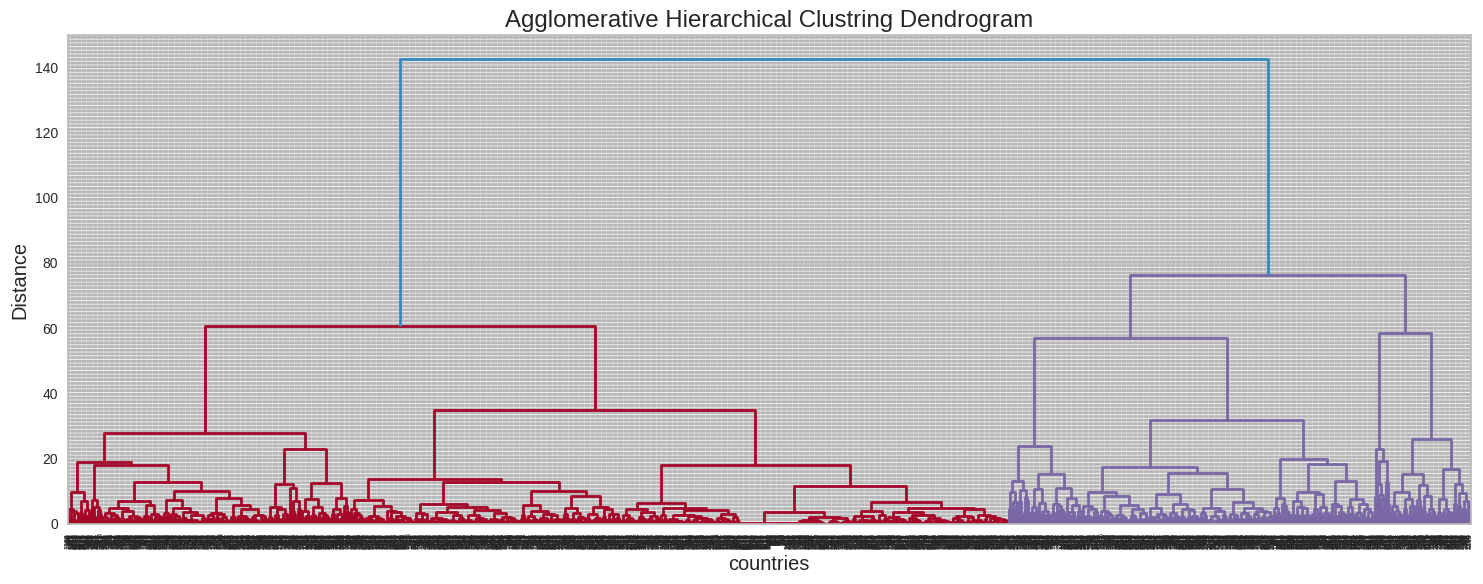

In [ ]:
# Grafico
link = linkage(pcaData, metric = 'euclidean', method = 'ward')

plt.figure(figsize = (15,6))
plt.title('Agglomerative Hierarchical Clustring Dendrogram')
plt.xlabel('countries')
plt.ylabel('Distance')
dendrogram(link)
plt.tight_layout()

In [ ]:
# Entrenando el modelo con 7 grupos
modelAGC = agc(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
modelAGC.fit(pcaData)
sPredAGC = pd.Series(modelAGC.labels_)
print(pd.concat({'count' : sPredAGC.value_counts(),
                 'percent' : round(sPredAGC.value_counts(normalize = True)*100, 2)},
                axis = 1 ))

   count  percent
3    701    27.49
0    531    20.82
1    512    20.08
6    497    19.49
2    147     5.76
5    135     5.29
4     27     1.06


#### <u>Seleccion del mejor metodo de agrupación</u>:

In [ ]:
# Metricas
silhouette_km = '%.2f' % sil_score(sData, pcaPredKM)
davies_km = '%.2f' % davies_bouldin_score(sData, pcaPredKM)
silhouette_agc = '%.2f' % sil_score(sData, sPredAGC)
davies_agc = '%.2f' % davies_bouldin_score(sData, sPredAGC)

In [ ]:
compare_model = pd.DataFrame({'K-Means': [silhouette_km, davies_km],
                         'Hierarchical': [silhouette_agc, davies_agc]},
                        index = ['Silhouette Score', 'Davies Bouldin Score'])

compare_model.head()

,K-Means,Hierarchical
Silhouette Score,0.23,0.16
Davies Bouldin Score,1.37,1.45


**Insights:**
* Podemos ver que K-Means es el mejor modelo para agrupar los jugadores, ya que presenta las mejores métricas.
* Debido a que el valor de Silhouette de K-Means es más cercano a uno (0,23 a comparación con 0,16) y el valor de Davies-Bouldin esta mas cerca del cero (1,37 contra 1,45).

#### <u>Conclusiones de los grupos creados</u>:

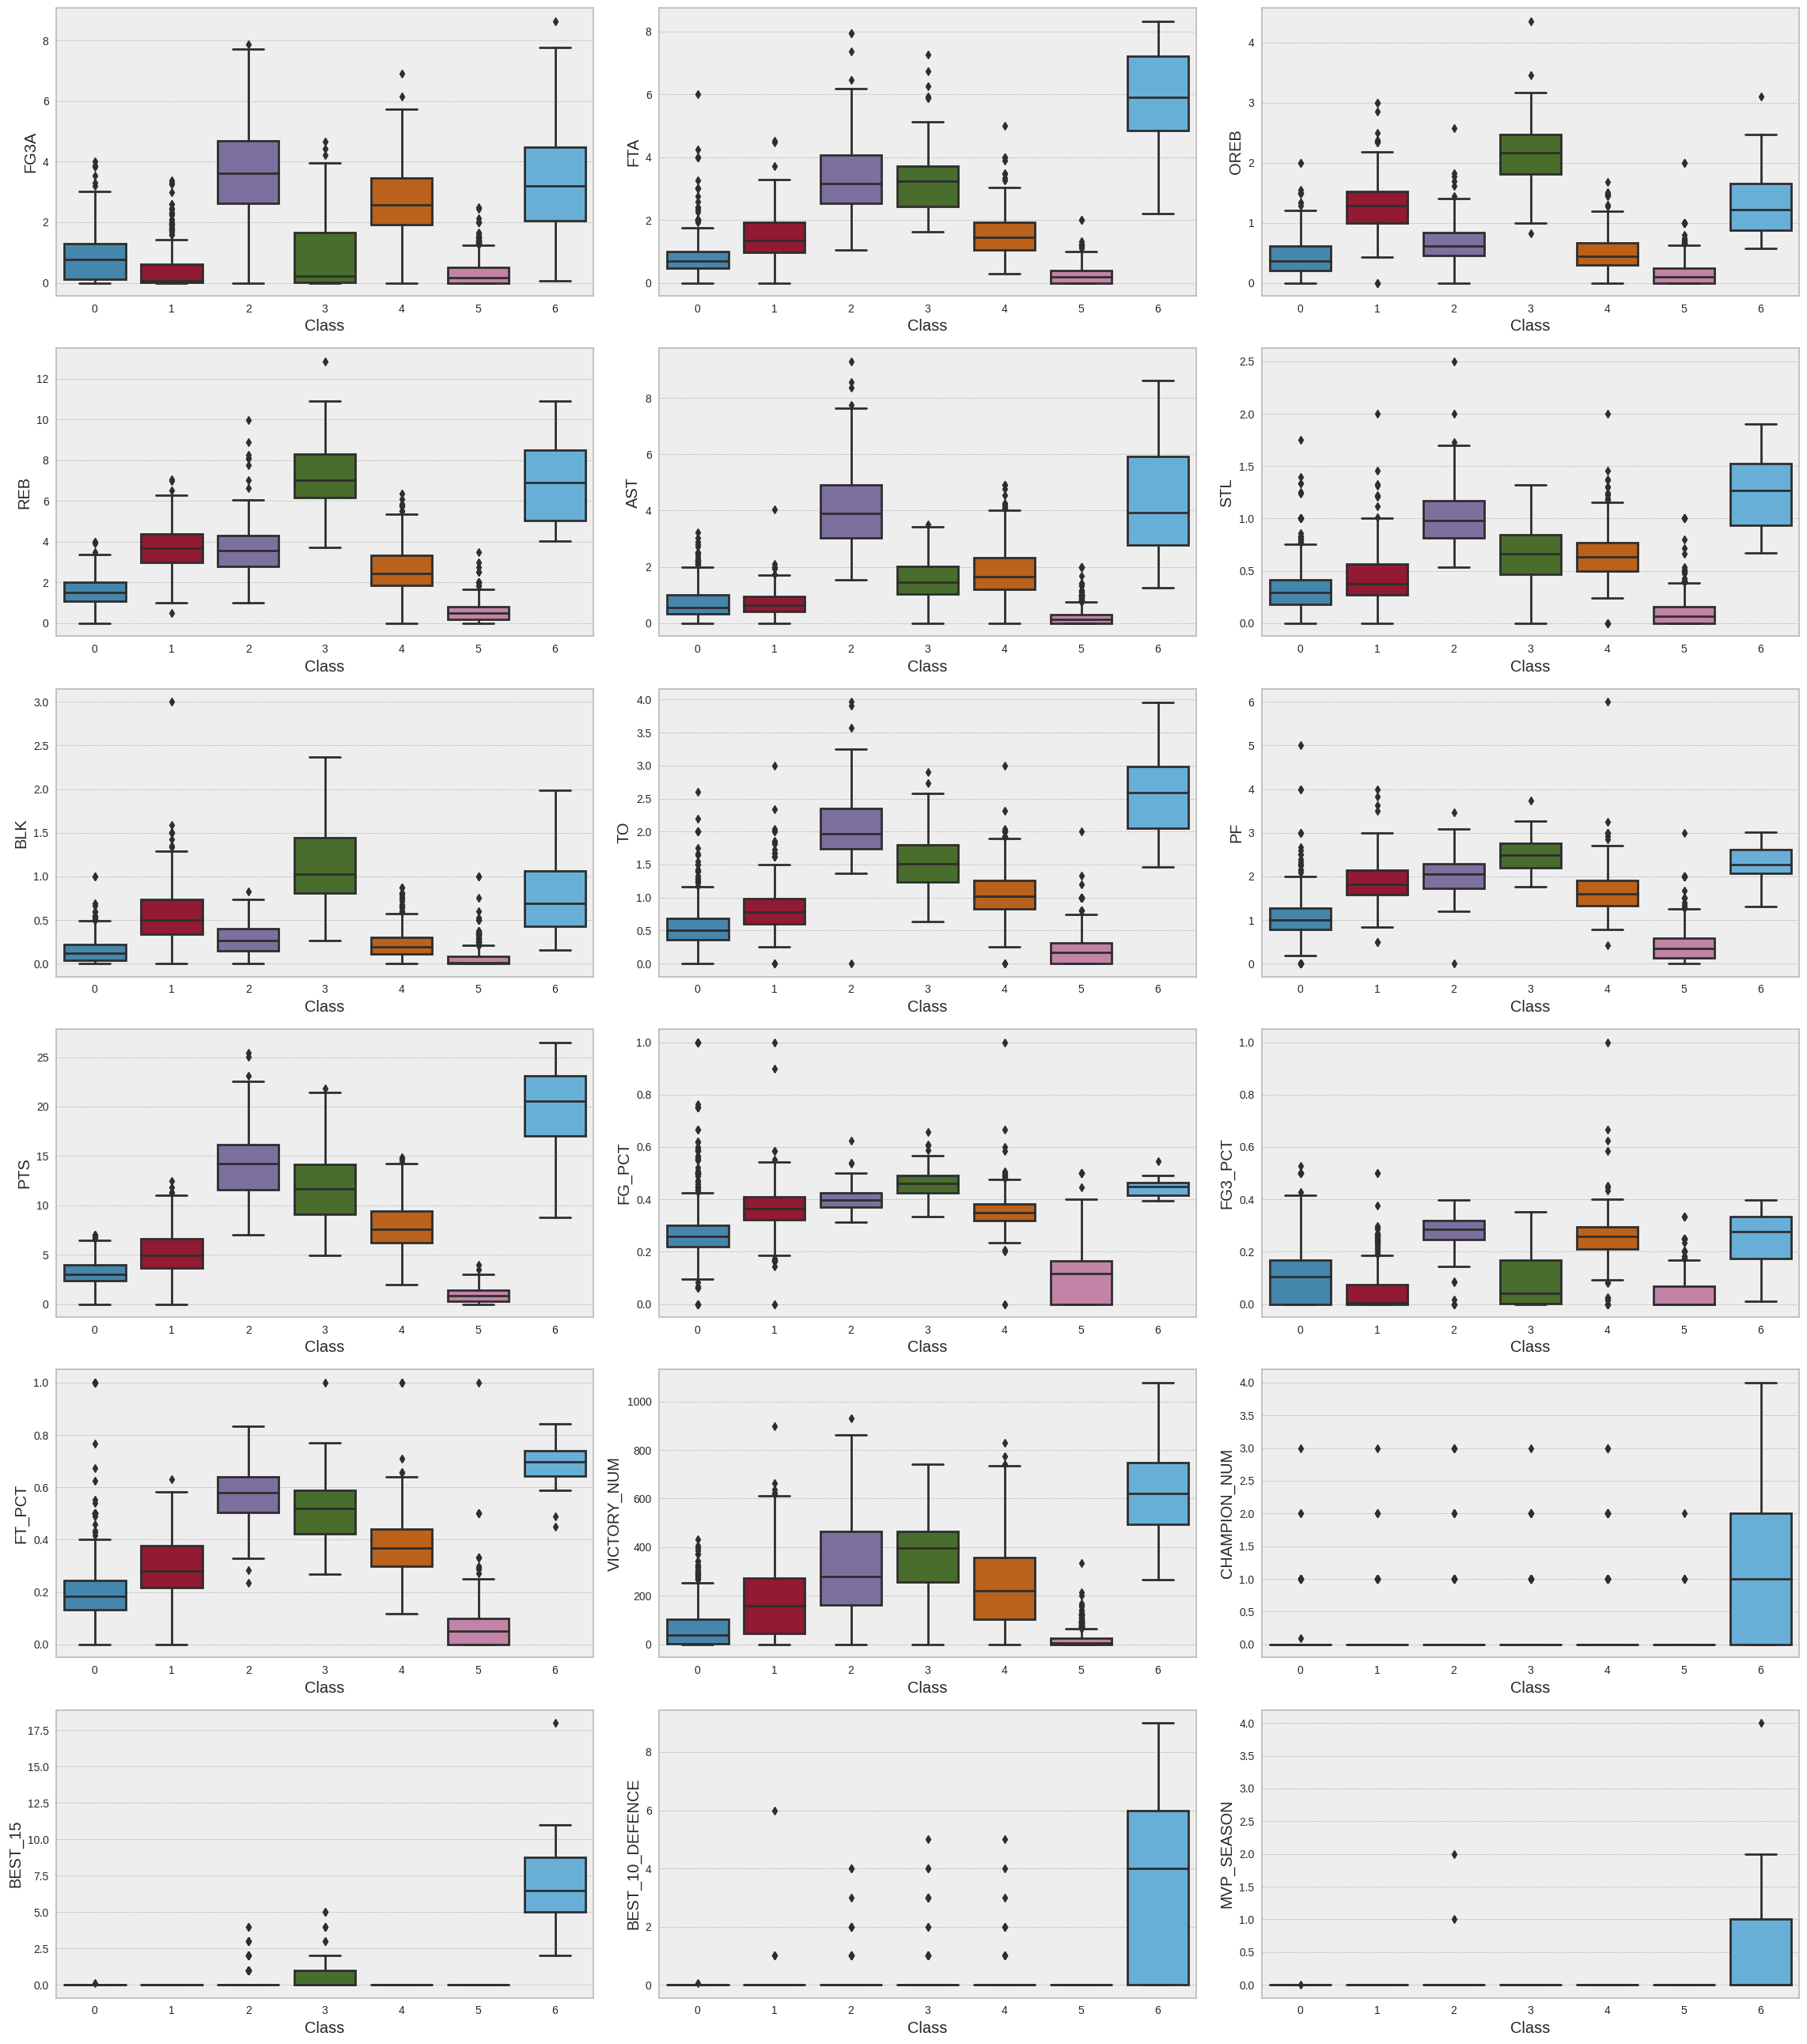

In [ ]:
# Grafico para comparar los grupos con cada una de las estadisticas de los jugadores
dataKM = players.copy()
dataKM['Class'] = pcaPredKM
fig, [ax1, ax2, ax3, ax4, ax5, ax6] = plt.subplots(6, 3, figsize = (23, 26))
ax = [ax1, ax2, ax3, ax4, ax5, ax6]
j, k = 0, 0
for i in dataKM.drop(columns = "Class").columns:
    sns.boxplot(x = "Class", y = i, data = dataKM, ax = ax[j][k])
    if divmod(k,2) == (1,0):
        j += 1
        k = 0
    else: k += 1
fig.tight_layout()
plt.show()

In [ ]:
# Tabla de los grupos con los promedios de cada variable
dataKM.groupby('Class').median()

,FG3A,FTA,OREB,REB,AST,STL,BLK,TO,PF,PTS,FG_PCT,FG3_PCT,FT_PCT,VICTORY_NUM,CHAMPION_NUM,BEST_15,BEST_10_DEFENCE,MVP_SEASON
Class,,,,,,,,,,,,,,,,,,
0,0.760638,0.700000,0.368664,1.508507,0.544850,0.290323,0.121528,0.500000,1.000000,3.000000,0.257024,0.103727,0.184157,40.0,0.0,0.0,0.0,0.0
1,0.062099,1.358169,1.277778,3.666667,0.653846,0.377088,0.497047,0.780488,1.811856,4.961353,0.364755,0.005660,0.281863,160.0,0.0,0.0,0.0,0.0
2,3.611111,3.149515,0.609907,3.552486,3.891530,0.978471,0.266871,1.964339,2.044776,14.236538,0.396281,0.286069,0.578421,279.0,0.0,0.0,0.0,0.0
3,0.215743,3.228814,2.170139,7.031789,1.455405,0.667001,1.027545,1.512651,2.494757,11.652015,0.460791,0.042120,0.517761,395.0,0.0,0.0,0.0,0.0
4,2.574751,1.437330,0.440318,2.449013,1.641955,0.632558,0.192020,1.025000,1.605568,7.609302,0.348087,0.257097,0.366944,222.0,0.0,0.0,0.0,0.0
5,0.175000,0.193548,0.095238,0.500000,0.131579,0.063830,0.012987,0.166667,0.350000,0.875000,0.115084,0.000000,0.050000,5.0,0.0,0.0,0.0,0.0
6,3.202403,5.899063,1.214460,6.891185,3.917518,1.269489,0.693032,2.583928,2.270483,20.575742,0.449327,0.275021,0.696141,619.5,1.0,6.5,4.0,0.0


**Insights:**
* **Grupo 0:** Este es uno de los dos grupos más grande en cuanto a cantidad de jugadores (777). A diferencia del otro grupo grande (numero 5) sus estadísticas son un poco mas altas, llegando a 3 puntos y casi 2 rebotes por partido. Se los podría considerar como jugadores "Suplentes".
* **Grupo 1:** Tiene características o cualidades muy parecidas al grupo 3, pero con un nivel mas bajo. Aportando 5 puntos, 4 rebotes y casi un bloqueo por partido, mientras que no llega a la unidad en asistencias, robos y tiro de tres. Se lo podría considerar como un jugador "Titular poste bajo".
* **Grupo 2:** Este es un grupo selecto de jugadores, que lograron estar dentro de los mejores quintetos de la temporada y ademas dos de ellos ganaron el MVP de temporada. Sumando aproximadamente 14 puntos, 4 asistencias, 4 rebotes, 1 robo y 4 intentos de tres por partido, lo que lo convierte en un jugador muy solido en el perímetro. Se lo podría considerar como una "Estrella perimetral".
* **Grupo 3:** Otro grupo selecto, ya que solo esta conformado por 141 jugadores. De los cuales algunos ganaron un campeonato ó fueron considerados entre los mejores quintetos de la temporada. En este grupo se destacan estadísticas como puntos (12), rebotes (7) y bloqueos (1), por lo que se ve un juego muy solido en la zona pintada (cerca del aro). No sumando en estadísticas como asistencias, robos y tiro de tres. Al grupo se lo podría considerar como un jugador "Estrella poste bajo".
* **Grupo 4:** Grupo de jugadores que juegan en el perímetro, ya que buscan el tiro de 3 (2,6 por partido) y consiguen mas robos que bloqueos (0,6 y 0,2 respectivamente). Suman aproximadamente 8 puntos, 2 asistencias y 2,5 rebotes por partido. Lo podemos considerar como un jugador "Titular perimetral".
* **Grupo 5:** Este es otro de los grupos grandes en cuanto a cantidad de jugadores (861). Este grupo tiene solo 5 victorias en promedio de cada jugador en toda su carrera, sumado a que no llegan a la unidad en ninguna de las estadísticas de juego. Por lo cual son jugadores que no llegaron a tener minutos en cancha y no tuvieron lugar en ningún equipo. Se los puede considerar como "No tuvo exito".
* **Grupo 6:** Es el grupo mas selecto de todos, conformado solo por 22 jugadores entre 2003 al 2021. Logrando en este grupo todos los reconocimientos a nivel individual como grupal (MVP de temporada, mejores quintetos ofensivos y defensivos y campeonatos). Aportando aproximadamente 21 puntos, 7 rebotes y 4 asistencias por partido en toda su carrera. Sin duda se los podría considerar como "Súper estrella".

In [ ]:
# Cambio el nombre a los grupos
grupos = {0: 'Suplentes', 1: 'Titular poste bajo', 2: 'Estrella perimetral', 3: 'Estrella poste bajo',
          4: 'Titular perimetral', 5: 'No tuvo exito', 6: 'Súper estrella'}

dataKM['PLAYER_NAME'] = df_players['PLAYER_NAME']
dataKM.Class.replace(grupos, inplace = True)
dataKM.Class.value_counts()

No tuvo exito          861
Suplentes              777
Titular perimetral     381
Titular poste bajo     279
Estrella perimetral    141
Estrella poste bajo     89
Súper estrella          22
Name: Class, dtype: int64

In [ ]:
# Muestro el grupo de "Súper estrella"
dataKM[dataKM.Class == 'Súper estrella']['PLAYER_NAME']

124             Anthony Davis
204             Blake Griffin
334           Carmelo Anthony
403                Chris Paul
496            Damian Lillard
683             Dirk Nowitzki
709            Draymond Green
727             Dwight Howard
729               Dwyane Wade
862     Giannis Antetokounmpo
1050             James Harden
1193             Jimmy Butler
1214              Joel Embiid
1372            Kawhi Leonard
1420             Kevin Durant
1421            Kevin Garnett
1456              Kobe Bryant
1522             LeBron James
1930              Paul George
2110        Russell Westbrook
2237            Stephen Curry
2316               Tim Duncan
Name: PLAYER_NAME, dtype: object

<Figure size 1200x1200 with 0 Axes>

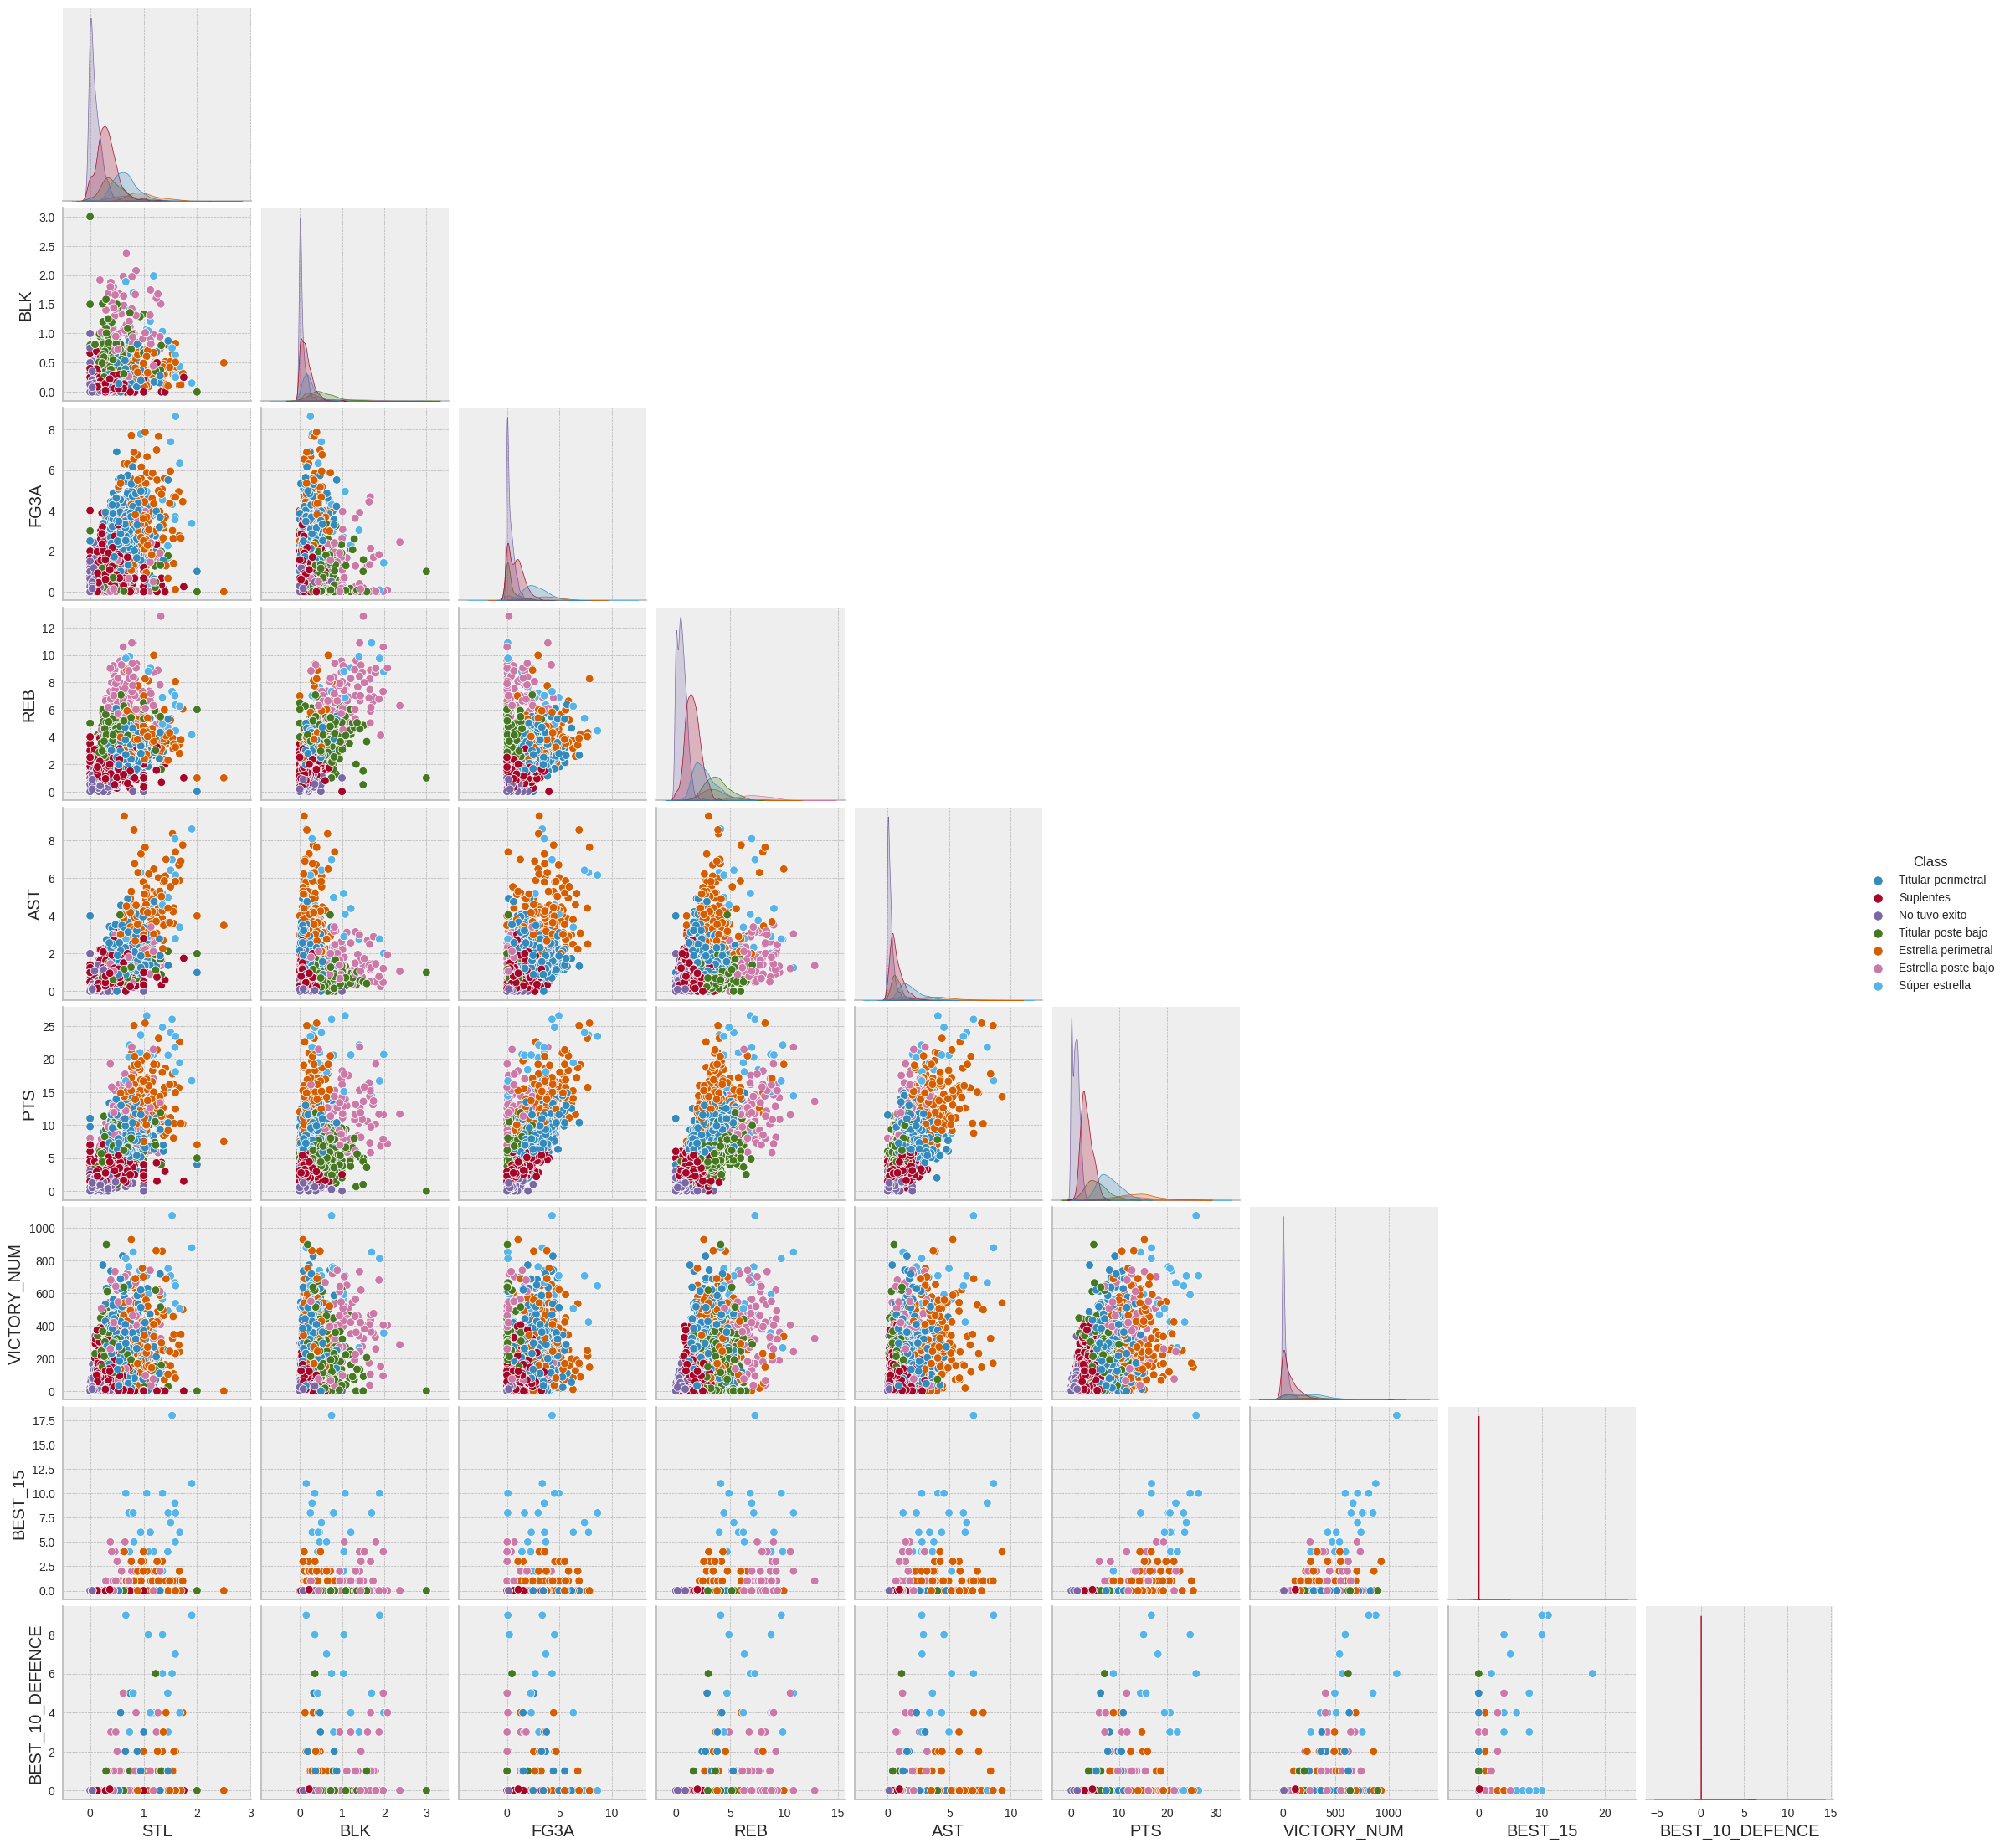

In [ ]:
# Grafico de relación
plt.figure(figsize=(12, 12))

sns.pairplot(dataKM[['STL', 'BLK', 'FG3A', 'REB', 'AST', 'PTS',
                     'VICTORY_NUM', 'BEST_15', 'BEST_10_DEFENCE', 'Class']], diag_kind='kde', hue='Class', corner=True)

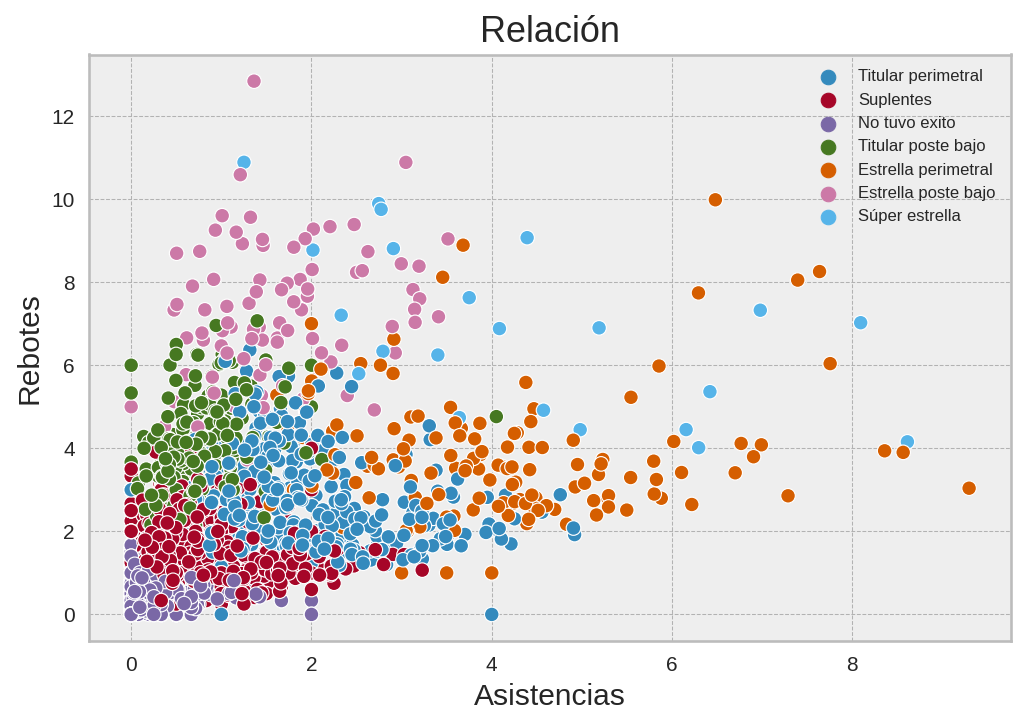

In [ ]:
# En este grafico se pueden ver con claridad los distintos grupos
f, ax = plt.subplots(figsize=(7,5), dpi=150)

sns.scatterplot(dataKM, x='AST', y='REB', hue='Class')
ax.set(xlabel='Asistencias', ylabel='Rebotes', title='Relación')
ax.legend(fontsize=8)

f.tight_layout()